In [4]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

<h4>Classification Overview</h4>
<ul>
<li>Predict a binary class as output based on given features.
</li>

<li>Examples: Do we need to follow up on a customer review? Is this transaction fraudulent or valid one? Are there signs of onset of a medical condition or disease? Is this considered junk food or not?</li>

<li>Linear Model. Estimated Target = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub><br>
where, w is the weight and x is the feature
</li>

<li><b>Logistic Regression</b>. Estimated Probability = <b>sigmoid</b>(w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub>)<br>
where, w is the weight and x is the feature
</li>
<li>Linear model output is fed thru a sigmoid or logistic function to produce the probability.</li>
<li>Predicted Value: Probability of a binary outcome.  Closer to 1 is positive class, closer to 0 is negative class</li>
<li>Algorithm Used: Logistic Regression. Objective is to find the weights w that maximizes separation between the two classes</li>
<li>Optimization: Stochastic Gradient Descent. Seeks to minimize loss/cost so that predicted value is as close to actual as possible</li>
<li>Cost/Loss Calculation: Logistic loss function</li>
</ul>

In [5]:
# Sigmoid or logistic function
# For any x, output is bounded to 0 & 1.
def sigmoid_func(x):
    return 1.0/(1+math.exp(-x))

In [9]:
sigmoid_func(10)

0.9999546021312976

In [7]:
sigmoid_func(-100)

3.7200759760208356e-44

In [10]:
sigmoid_func(0)

0.5

In [11]:
# Sigmoid function example
x = pd.Series(np.arange(-8,8,0.5))
y = x.map(sigmoid_func)

In [12]:
x.head()

0   -8.0
1   -7.5
2   -7.0
3   -6.5
4   -6.0
dtype: float64

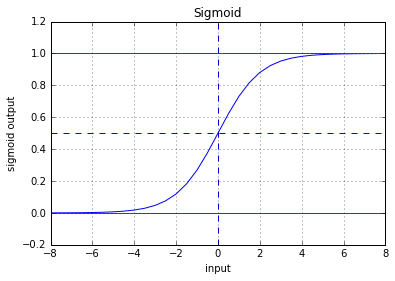

In [13]:
plt.plot(x,y)
plt.ylim((-0.2,1.2))
plt.xlabel('input')
plt.ylabel('sigmoid output')
plt.grid(True)

plt.axvline(x=0,ymin=0,ymax=1, ls='dashed')
plt.axhline(y=0.5,xmin=0,xmax=10, ls='dashed')
plt.axhline(y=1.0,xmin=0,xmax=10,color='r')
plt.axhline(y=0.0,xmin=0,xmax=10,color='r')
plt.title('Sigmoid')

Example Dataset - Hours spent and Exam Results: 
https://en.wikipedia.org/wiki/Logistic_regression

Sigmoid function produces an output between 0 and 1 no.  Input closer to 0 produces and output of 0.5 probability.  Negative input produces value less than 0.5 while positive input produces value greater than 0.5

In [14]:
data_path = \
r'C:\AWSMLCourse\Data\ClassExamples\HoursExam\HoursExamResult.csv'

In [15]:
df = pd.read_csv(data_path)

Input Feature: Hours<br>
Output: Pass (1 = pass, 0 = fail)

In [19]:
df.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [20]:
# optimal weights given in the wiki dataset
def straight_line(x):
    return 1.5046*x - 4.0777 

In [21]:
# How does weight affect outcome
def straight_line_weight(weight1,x):
    return weight1*x - 4.0777 

In [22]:
# Generate probability by running feature thru the linear model and then thru sigmoid function
y_vals = df.Hours.map(straight_line).map(sigmoid_func)

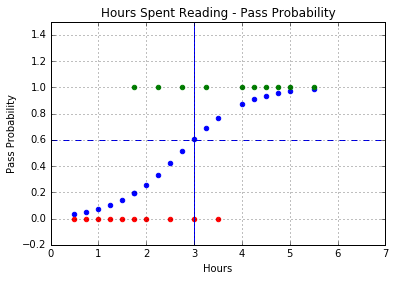

In [28]:
plt.scatter(x=df.Hours,y=y_vals,color='b',label='logistic')
plt.scatter(x=df[df.Pass==1].Hours,y=df[df.Pass==1].Pass, color='g', label='pass')
plt.scatter(x=df[df.Pass==0].Hours,y=df[df.Pass==0].Pass, color='r',label='fail')
plt.title('Hours Spent Reading - Pass Probability')
plt.xlabel('Hours')
plt.ylabel('Pass Probability')
plt.grid(True)
#plt.legend()
plt.xlim((0,7))
plt.ylim((-0.2,1.5))

#plt.axvline(x=2.75,ymin=0,ymax=1)
#plt.axhline(y=0.5,xmin=0,xmax=6, label='cutoff at 0.5',ls='dashed')

#plt.axvline(x=2,ymin=0,ymax=1)
#plt.axhline(y=0.3,xmin=0,xmax=6, label='cutoff at 0.3', ls='dashed')

plt.axvline(x=3,ymin=0,ymax=1)
plt.axhline(y=0.6,xmin=0,xmax=6, label='cutoff at 0.6', ls='dashed')
#plt.legend()

At 2.7 hours of study time, we hit 0.5 probability.  So, any student who spent 2.7 hours or more would have a higher probability of passing the exam.

In the above example,<br>
1. Top right quadrant = true positive. pass got classified correctly as pass
2. Bottom left quadrant = true negative. fail got classified correctly as fail
3. Top left quadrant = false negative. pass got classified as fail
4. Bottom right quadrant = false positive. fail got classified as pass

Cutoff can be adjusted; instead of 0.5, cutoff could be established at 0.4 or 0.6 depending on the nature of problem and impact of misclassification

In [30]:
weights = [0,1,2]
y_at_weight = {}

for w in weights:
    y_calculated = []
    y_at_weight[w] = y_calculated

    for x in df.Hours:
        y_calculated.append(sigmoid_func(straight_line_weight(w,x)))

In [ ]:
#y_sig_vals = y_vals.map(sigmoid_func)

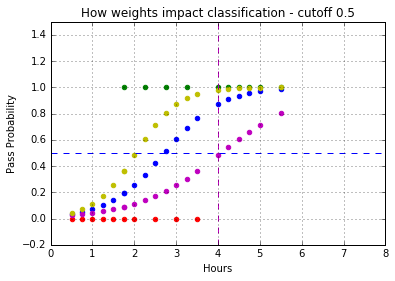

In [38]:
plt.scatter(x=df.Hours,y=y_vals,color='b', label='logistic curve')
plt.scatter(x=df[df.Pass==1].Hours,y=df[df.Pass==1].Pass, color='g', label='pass')
plt.scatter(x=df[df.Pass==0].Hours,y=df[df.Pass==0].Pass, color='r',label='fail')

#plt.scatter(x=df.Hours,y=y_at_weight[0],color='k', label='at wt 0')
plt.scatter(x=df.Hours,y=y_at_weight[1],color='m', label='at wt 1')
plt.scatter(x=df.Hours,y=y_at_weight[2],color='y', label='at wt 2')
plt.xlim((0,8))
plt.ylim((-0.2,1.5))
#plt.axvline(x=2.75,ymin=0,ymax=1, ls='dashed')
plt.axhline(y=0.5,xmin=0,xmax=6, color = 'b', ls='dashed')
#plt.axvline(x=2,ymin=0,ymax=1, color='y', ls='dashed')
plt.axvline(x=4,ymin=0,ymax=1, color='m', ls='dashed')
plt.xlabel('Hours')
plt.ylabel('Pass Probability')
plt.grid(True)
plt.title('How weights impact classification - cutoff 0.5')
#plt.legend()

Logistic Regression Cost/Loss Function<br>

In [41]:
# Cost Function
z = pd.Series(np.linspace(0.0001,0.999999,100))
ypositive = -z.map(math.log)
ynegative = -z.map(lambda x: math.log(1-x))

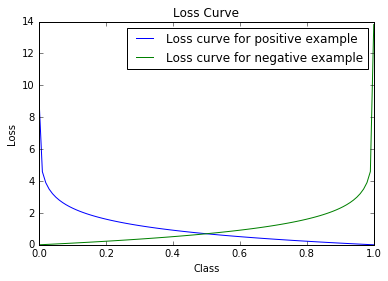

In [42]:
plt.plot(z,ypositive, label='Loss curve for positive example')
plt.plot(z,ynegative, label='Loss curve for negative example')
plt.ylabel('Loss')
plt.xlabel('Class')
plt.title('Loss Curve')
plt.legend()

Cost function is a log curve<br>
1. positive example correctly classified as positive is given a lower loss/cost
2. positive example incorrectly classified as negative is given a higher loss/cost
3. Negative example correctly classified as negative is given a lower loss/cost
4. Negative example incorrectly classifed as positive is given a higher loss/cost 

In [43]:
def compute_logisitic_cost(y_actual, y_predicted):
    y_pos_cost = y_predicted[y_actual==1]
    y_neg_cost = y_predicted[y_actual == 0]
    
    positive_cost = (-y_pos_cost.map(math.log)).sum()
    negative_cost = -y_neg_cost.map(lambda x: math.log(1 - x)).sum()
    return positive_cost + negative_cost

In [44]:
# Example of how prediction vs actual impact loss
# Prediction is exact opposite of actual. Loss/Cost should be very high
actual = pd.Series([1,0,1])
predicted = pd.Series([0.001,.9999,0.0001])
print('Loss: {0:0.3f}'.format(compute_logisitic_cost(actual, predicted)))

Loss: 25.328


In [45]:
# Prediction is close to actual. Loss/Cost should be very low
y_actual = pd.Series([1,0,1])
y_predicted = pd.Series([0.9,0.1,0.8])
print('Loss: {0:0.3f}'.format(compute_logisitic_cost(y_actual, y_predicted)))

Loss: 0.434


In [46]:
# Prediction is midpoint. Loss/Cost should be high
y_actual = pd.Series([1,0,1])
y_predicted = pd.Series([0.5,0.5,0.5])
print('Loss: {0:0.3f}'.format(compute_logisitic_cost(y_actual, y_predicted)))

Loss: 2.079


In [47]:
# Prediction is midpoint. Loss/Cost should be high
y_actual = pd.Series([1,0,1])
y_predicted = pd.Series([0.8,0.4,0.7])
print('Loss: {0:0.3f}'.format(compute_logisitic_cost(y_actual, y_predicted)))

Loss: 1.091


In [48]:
weight = pd.Series(np.linspace(-1.5,5,num=100))
cost = []
cost_at_wt = []
for w1 in weight:
    y_calculated = []
    for x in df.Hours:
        y_calculated.append (sigmoid_func(straight_line_weight(w1,x)))
    
    cost_at_wt.append(compute_logisitic_cost(df.Pass, pd.Series(y_calculated)))    

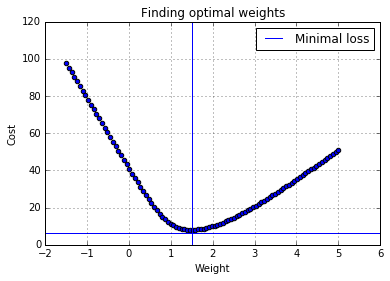

In [49]:
plt.scatter(x=weight, y=cost_at_wt)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.grid(True)
plt.axvline(x=1.5,ymin=0,ymax=100, label='Minimal loss')
plt.axhline(y=6.5,xmin=0,xmax=6)
plt.title('Finding optimal weights')
plt.legend()

<h4>Summary</h4>
<p><b>Binary Classifier</b> Predicts positive class probability of an observation </p>
<p><b>Logistic or Sigmod function</b> has an important property where output is between 0 and 1 for any input.  This output is used by binary classifiers as a probability of positive class</p>

<p><b>True Positive</b> - Samples that are actual-positives correctly predicted as positive </p>
<p><b>True Negative</b> - Samples that are actual-negatives correctly predicted as negative </p>
<p><b>False Negative</b> - Samples that are actual-positives incorrectly predicted as negative </p>
<p><b>False Positive</b> - Samples that are actual-negatives incorrectly predicted as positive </p>

<p><b>Logistic Loss Function</b> is parabolic in nature. It has an important property of not only telling us the loss at a given weight, but also tells us which way to go to minimize loss</p>
<p><b>Gradient Descent</b> optimization alogrithm uses loss function to move the weights of all the features and iteratively adjusts the weights until optimal value is reached</p>

<p><b>Batch Gradient Descent</b> predicts y value for all training examples and then adjusts the value of weights based on loss. It can converge much slower when training set is very large. Training set order does not matter as every single example in the training set is considered before making adjustments</p>

<p><b>Stochastic Gradient Descent</b> predicts y value for next training example and immediately adjusts the value of weights.</p> It can converge faster when training set is very large.  Training set should be random order otherwise model will not learn correctly.  <b>AWS ML uses Stochastic Gradient Descent</b>